In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart-checkpoint.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<Axes: xlabel='HeartDisease', ylabel='count'>

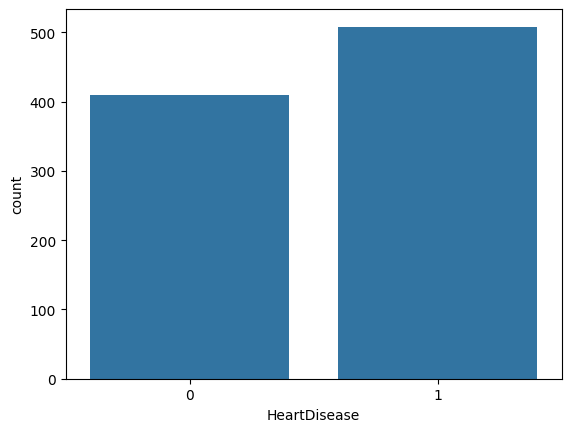

In [4]:
sns.countplot(x=df['HeartDisease'])

In [5]:
# compute correlation between two numeric Series
df['Age'].corr(df['HeartDisease'])

np.float64(0.28203850581899736)

ETA

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
cols = df.columns
print(cols)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


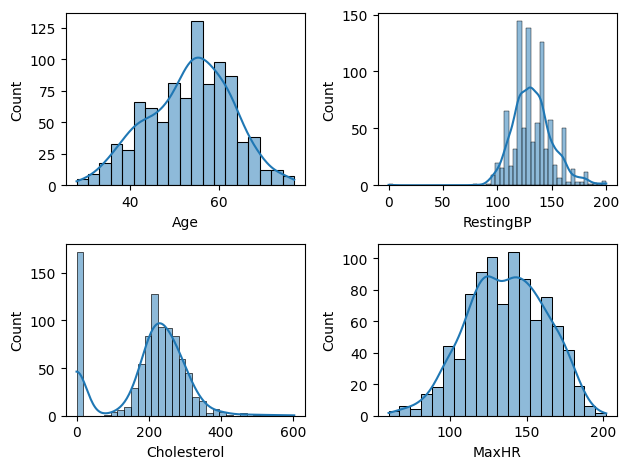

In [9]:
def ploting(val,num):
    plt.subplot(2,2,num)
    sns.histplot(df[val],kde=True)

ploting('Age',1)
ploting('RestingBP',2)
ploting('Cholesterol',3)
ploting('MaxHR',4)

plt.tight_layout()

In [10]:
ch_mean = df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()
print(ch_mean)

244.6353887399464


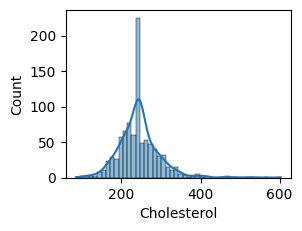

In [11]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean.round(2))

ploting('Cholesterol',1)

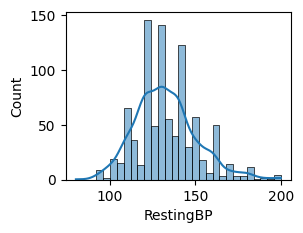

In [12]:
RestingBP_mean= df.loc[df['RestingBP']!=0,'RestingBP'].mean().round(2)
df['RestingBP']= df['RestingBP'].replace(0,RestingBP_mean)
ploting('RestingBP',1)

In [13]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540893,244.636253,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.640000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
!pip install sheryanalysis

In [15]:
import sheryanalysis as sh
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

<Axes: xlabel='Sex', ylabel='count'>

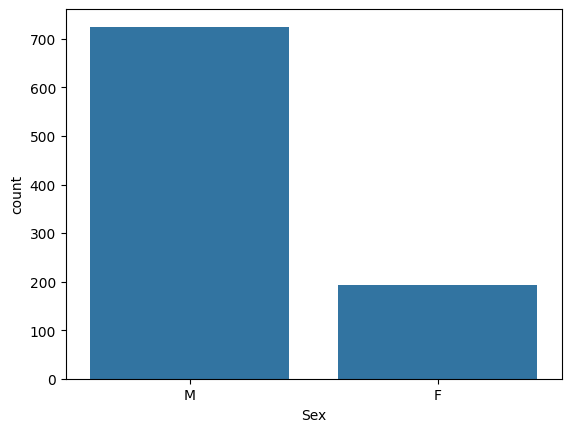

In [16]:
sns.countplot(x=df['Sex'])

<Axes: xlabel='ExerciseAngina', ylabel='count'>

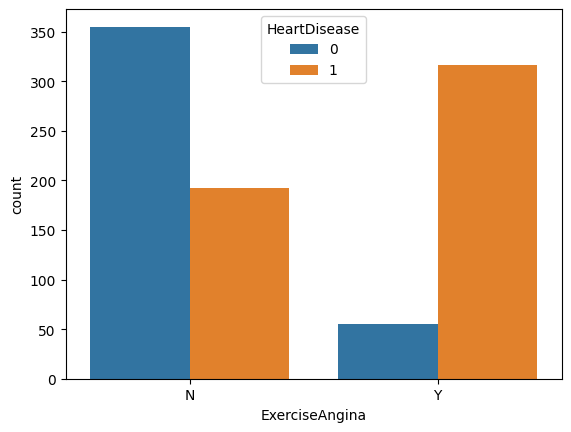

In [17]:
sns.countplot(x=df['ExerciseAngina'],hue=df['HeartDisease'])

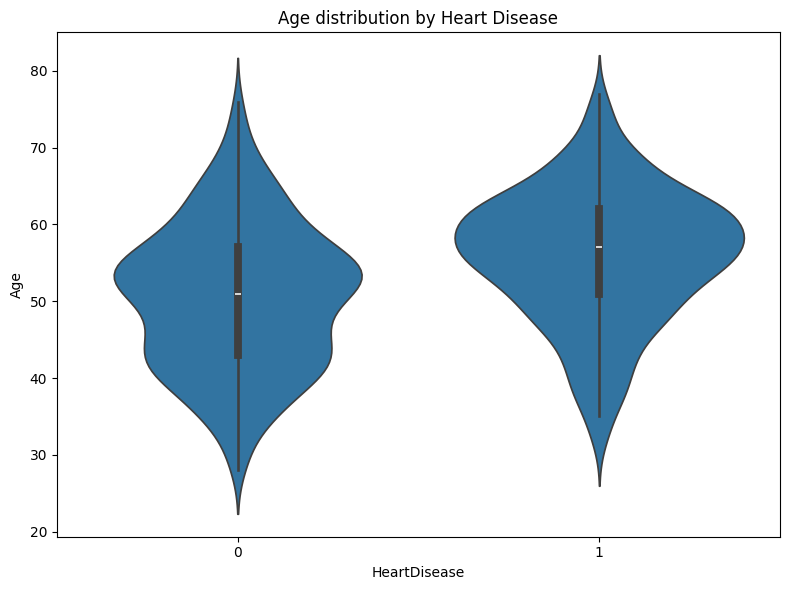

In [18]:
plt.figure(figsize=(8,6))
# plot distribution of Age grouped by HeartDisease (0 = no, 1 = yes)
sns.violinplot(x='HeartDisease', y='Age', data=df)
plt.title('Age distribution by Heart Disease')
plt.xlabel('HeartDisease')
plt.ylabel('Age')
plt.tight_layout()


<Axes: >

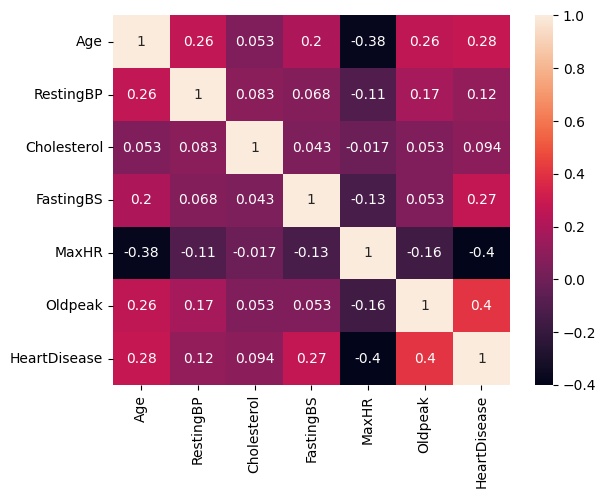

In [19]:
sns.heatmap(df.corr(numeric_only = True),annot=True)

#data preprossessing and cleaning

In [20]:
df_encode = pd.get_dummies(df,drop_first=True)
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [21]:
df_encode = df_encode.astype(int)
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols =  ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_encode[numerical_cols]= scaler.fit_transform(df_encode[numerical_cols])

In [23]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import  SVC
from sklearn.model_selection import train_test_split

In [25]:
X = df_encode.drop("HeartDisease",axis=1)

In [26]:
Y = df_encode["HeartDisease"]

In [27]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [28]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=42)

In [29]:
models={"model_LR":LogisticRegression(),"knn_model":KNeighborsClassifier(),
"Nb_model":GaussianNB(),"SVC_model":SVC,
"model_DT":DecisionTreeClassifier
    
}

In [30]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
155,0.264027,1.249139,1.829320,1,0.518368,2.303858,1,0,0,0,1,0,1,1,0
362,0.264027,1.249139,-0.009689,0,-1.485840,-0.727592,1,0,1,0,0,1,0,1,0
869,0.582246,0.971054,-0.610182,1,0.793455,0.282891,1,0,1,0,1,0,0,0,1
101,-0.266338,-0.141284,-1.229440,0,-1.446542,-0.727592,1,0,0,0,1,0,0,0,1
199,0.370100,-0.141284,1.191296,0,-1.525138,0.282891,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.584556,-0.697453,0.177965,0,-1.053560,-0.727592,0,0,0,0,0,1,0,0,1
270,-0.902775,-0.697453,-0.366232,0,0.125386,-0.727592,1,0,0,0,1,0,0,0,1
860,0.688318,-0.141284,0.159199,0,0.282579,0.282891,1,0,0,0,1,0,1,0,1
435,0.688318,1.082288,-0.009689,0,-0.739174,-0.727592,1,0,0,0,0,1,1,0,1


In [31]:
result=[]
acc=[]
for name,model in models.items():
    if isinstance(model, type):            # if a class was passed, instantiate it
        model = model()
    model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    result.append({
        "model":name,
        'Accuracy':round(acc,4),
        "f1":round(f1,4)
    })
print(result)

[{'model': 'model_LR', 'Accuracy': 0.8609, 'f1': 0.875}, {'model': 'knn_model', 'Accuracy': 0.8478, 'f1': 0.8659}, {'model': 'Nb_model', 'Accuracy': 0.8522, 'f1': 0.8651}, {'model': 'SVC_model', 'Accuracy': 0.8522, 'f1': 0.8702}, {'model': 'model_DT', 'Accuracy': 0.7957, 'f1': 0.8112}]


In [32]:
import joblib

joblib.dump(models['model_LR'],'Model_LR_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')


['columns.pkl']